<a href="https://colab.research.google.com/github/jlgjosue/ia-dl-unyleya/blob/master/Tarefa_07_Exemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p>Leia o terceiro capítulo da Unidade 3 e replique os exemplos apresentados, analisando-o linha a linha e comentando a função de cada comando presente no código. Comente cada saída gerada, justificando-a.
<p>Você deverá enviar o código em Python.


Vasilev et al (2019) apresentam o passo a passo para gerar novas imagens a partir da base de dados MNIST usando Keras. Para começar, vamos importar as bibliotecas necessárias:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist

from keras.layers import BatchNormalization, Input, Dense, Reshape, Flatten

from keras.layers.advanced_activations import LeakyReLU

from keras.models import Sequential, Model

from keras.optimizers import Adam

Using TensorFlow backend.



Em seguida, vamos implementar a função build_generator, que é a rede geradora. No exemplo apresentado pelo autor, ele utiliza uma rede totalmente conectada como gerador:

In [0]:
def build_generator(latent_dim: int):

  """

     Build discriminator network

     :param latent_dim: latent vector size

  """

 

  model = Sequential([

     Dense(128, input_dim=latent_dim),

     LeakyReLU(alpha=0.2),

     BatchNormalization(momentum=0.8),

     Dense(256),

     LeakyReLU(alpha=0.2),

     BatchNormalization(momentum=0.8),

     Dense(512),

     LeakyReLU(alpha=0.2),

     BatchNormalization(momentum=0.8),

     Dense(np.prod((28, 28, 1)), activation='tanh'),

     # Reajustar para o mesmo tamanho das imagens MNIST

     Reshape((28, 28, 1))

  ])

 

  model.summary()

 

  # O vetor latente de entrada z

  z = Input(shape=(latent_dim,))

  generated = model(z)

 

  # Construir o modelo de entrada e saída

  return Model(z, generated)

Com a rede geradora criada, é hora de construir a rede discriminadora. Novamente, essa será uma rede totalmente conectada simples:

In [0]:
def build_discriminator():
      model = Sequential([

        Flatten(input_shape=(28, 28, 1)),

        Dense(256),

        LeakyReLU(alpha=0.2),

        Dense(128),

        LeakyReLU(alpha=0.2),

        Dense(1, activation='sigmoid'),

      ], name='discriminator')  

      model.summary()  

      image = Input(shape=(28, 28, 1))

      output = model(image) 

      return Model(image, output)

#Após a implementação das redes geradora e discriminadora, é hora de implementar a função de treinamento:

def train(generator, discriminator, combined, steps, batch_size):

    """

      Train the GAN system

      :param generator: generator

      :param discriminator: discriminator

      :param combined: stacked generator and discriminator

      we'll use the combined network when we train the

      generator

      :param steps: number of alternating steps for training

      :param batch_size: size of the minibatch

    """

  

     # Carregando a base de dados

    (x_train, _), _ = mnist.load_data()

  

    # Reajustar a escala para um intervalo entre [-1, 1]

    x_train = (x_train.astype(np.float32) - 127.5) / 127.5

    x_train = np.expand_dims(x_train, axis=-1)

  

    # Verdades para o Discriminador

    real = np.ones((batch_size, 1))

    fake = np.zeros((batch_size, 1))

  

    latent_dim = generator.input_shape[1]

  

    for step in range(steps):

      # Treinando o discriminador  

      # Selecione um conjunto aleatório de imagens reais

      real_images = x_train[np.random.randint(0,

      x_train.shape[0], batch_size)]  

      # Pacote conjunto de valores (ruídos)

      noise = np.random.normal(0, 1, (batch_size, latent_dim))  

      # Gerando um conjunto de novas imagens
      generated_images = generator.predict(noise)  

      # Treinando o discriminador
      discriminator_real_loss = discriminator.train_on_batch(real_images, real)

      discriminator_fake_loss = discriminator.train_on_batch(generated_images, fake)

      discriminator_loss = 0.5 * np.add(discriminator_real_loss, discriminator_fake_loss)
      # Treinando o gerador
      # Vetor Z de valores latentes aleatórios
      noise = np.random.normal(0, 1, (batch_size, latent_dim))
      # Treinando o gerador
      # Observe que usamos os rótulos “válidos” para as imagens 
      # geradas para tentar maximizar o custo do discriminador
      generator_loss = combined.train_on_batch(noise, real)
      # Mostrando o progresso
      print("%d [Discriminator loss: %.4f%%, acc.: %.2f%%] Generator loss: %.4f%%]" % (step, discriminator_loss[0], 100 * discriminator_loss[1], generator_loss))

O próximo passo será gerar uma função comum para mostrar algumas das imagens geradas após a fase de treinamento, chamaremos essa função de plot_generated_images. Essa função será criada da seguinte forma: i) vamos criar um grid de tamanho nxn; ii) vamos criar um vetor latente de valores aleatórios de tamanho nxn para cada imagem gerada; iii) vamos gerar as imagens e colocá-las em cada célula do grid; iv) vamos mostrar o resultado:

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 233,985
Trainable params: 233,985
Non-trainable params: 0
_______________________________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Streaming output truncated to the last 5000 lines.
10001 [Discriminator loss: 0.7001%, acc.: 51.95%] Generator loss: 0.7394%]
10002 [Discriminator loss: 0.6714%, acc.: 60.16%] Generator loss: 0.7726%]
10003 [Discriminator loss: 0.6704%, acc.: 58.20%] Generator loss: 0.7566%]
10004 [Discriminator loss: 0.6756%, acc.: 55.86%] Generator loss: 0.7626%]
10005 [Discriminator loss: 0.6914%, acc.: 51.56%] Generator loss: 0.7689%]
10006 [Discriminator loss: 0.6849%, acc.: 55.86%] Generator loss: 0.7618%]
10007 [Discriminator loss: 0.6685%, acc.: 60.16%] Generator loss: 0.7369%]
10008 [Discriminator loss: 0.6866%, acc.: 51.17%] Generator loss: 0.7512%]
10009 [Discriminator loss: 0.6829%, acc.: 51.56%] Generator loss: 0.7518%]
10010 [Discriminator loss: 0.6712%, acc.: 58.59%] Generator loss: 0.7515%]
10011 [Discriminator loss: 0.6772%, acc.: 53.91%] Generator loss: 0.7619%]
10012 [Discriminator loss: 0.6765%, acc.: 56.64%] Generator loss: 0.7498%]
10013 [Discriminator loss: 0.6888%, acc.: 54.30%]

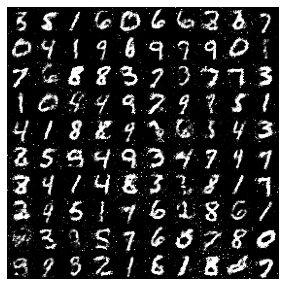

In [15]:
def plot_generated_images(generator):
     n = 10

     digit_size = 28 

     # Grande matriz contendo todas as imagens

     figure = np.zeros((digit_size * n, digit_size * n)) 

     latent_dim = generator.input_shape[1] 

     # Distribuição aleatória dos valores latentes n*n

     noise = np.random.normal(0, 1, (n * n, latent_dim)) 

     # Gerando as imagens

     generated_images = generator.predict(noise) 

     # Preenchendo a grande matriz com as imagens

     for i in range(n):

         for j in range(n):

              slice_i = slice(i * digit_size, (i + 1) * digit_size)

              slice_j = slice(j * digit_size, (j + 1) * digit_size)

              figure[slice_i, slice_j] = np.reshape(generated_images[i * n + j], (28, 28)) 

     # Mostrando os resultados

     plt.figure(figsize=(6, 5))

     plt.axis('off')

     plt.imshow(figure, cmap='Greys_r')

     plt.show()

#O último passo será montar os construtores do gerador, do discriminador, e agregar ambos na rede. Rodar o treinamento com 15.000 passos usando um otimizador ADAM, e mostrar os resultados ao final:

if __name__ == '__main__':

     latent_dim = 64 

     # Construir e compilar o discriminador

     discriminator = build_discriminator()

     discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])

      # Construir o gerador

     generator = build_generator(latent_dim)
     # Entrada z do gerador

     z = Input(shape=(latent_dim,))

     generated_image = generator(z)
     # Apenas treine o gerador para o modelo combinado

     discriminator.trainable = False
     # O gerador recebe as imagens geradas como entrada e

     # determina sua validade

     real_or_fake = discriminator(generated_image)
     # Empilhe o gerador e o discriminador em um modelo

     # combinado

     # Treine o gerador para enganar o discriminador

     combined = Model(z, real_or_fake)

     combined.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
     # Treine o Sistema GAN

     train(generator=generator, discriminator=discriminator, combined=combined, steps=15000, batch_size=128)

     # Mostre aleatoriamente algumas imagens geradas

     plot_generated_images(generator)